<a href="https://colab.research.google.com/github/Rehanwins/Rehan-23322022/blob/main/Rehan_D_S_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/tips (data for regression problem).csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.head()


,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,0,2,False,False,True,False
1,10.34,1.66,0,0,0,3,False,False,True,False
2,21.01,3.50,0,0,0,3,False,False,True,False
3,23.68,3.31,0,0,0,2,False,False,True,False
4,24.59,3.61,1,0,0,4,False,False,True,False


In [ ]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['time'] = df['time'].map({'Dinner': 0, 'Lunch': 1})


In [ ]:
df = pd.get_dummies(df, columns=['day'], prefix='day')

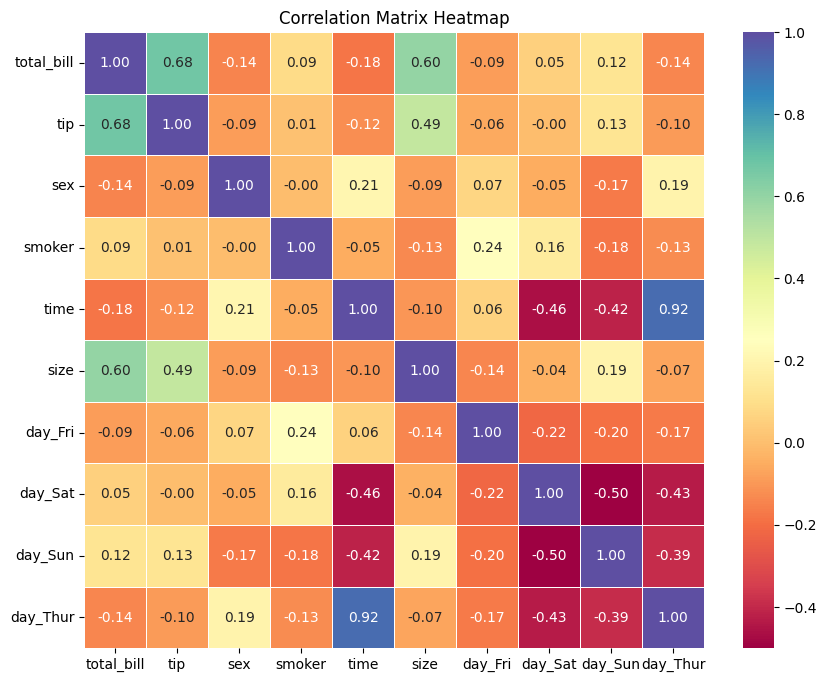

In [ ]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

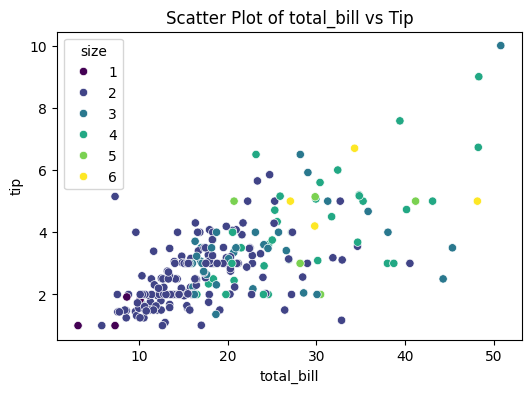

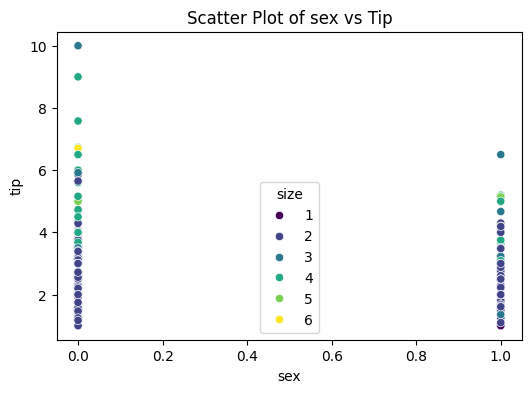

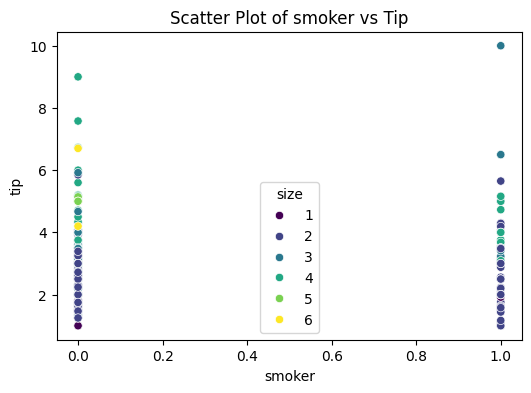

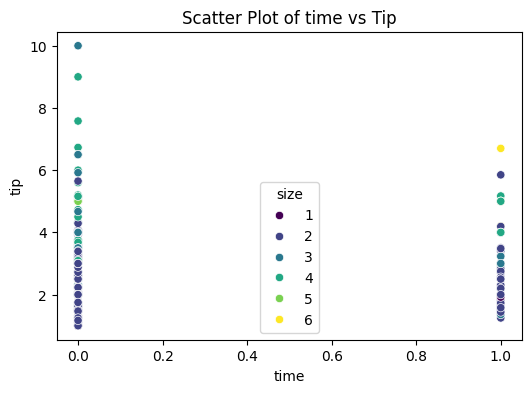

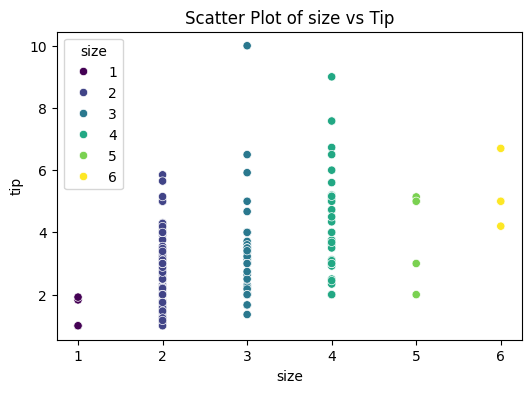

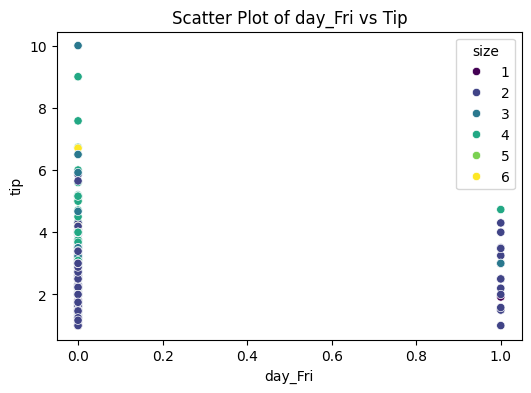

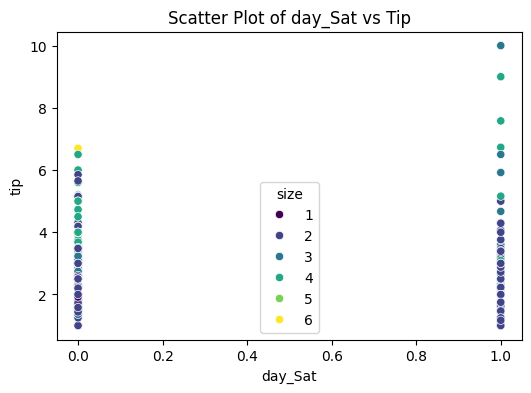

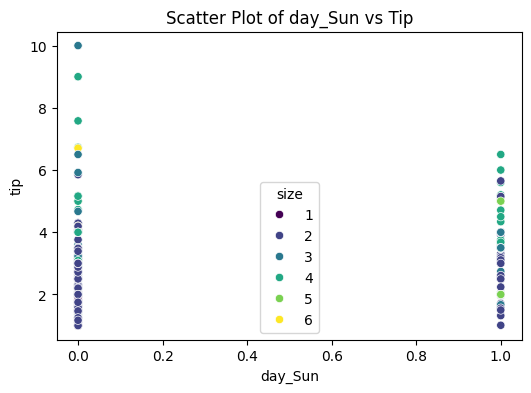

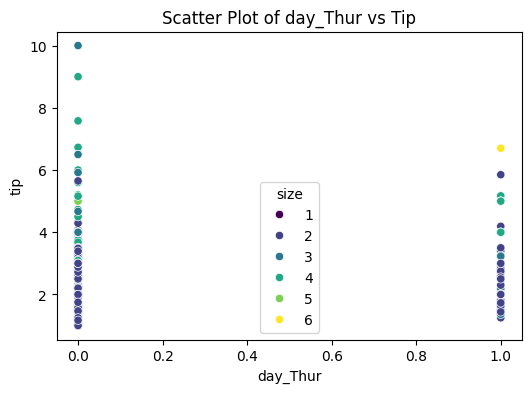

In [ ]:
X = df.drop('tip', axis=1)
y = df['tip']
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each feature against the target variable
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='tip',hue='size', palette="viridis")
    plt.title(f'Scatter Plot of {col} vs Tip')
    plt.show()

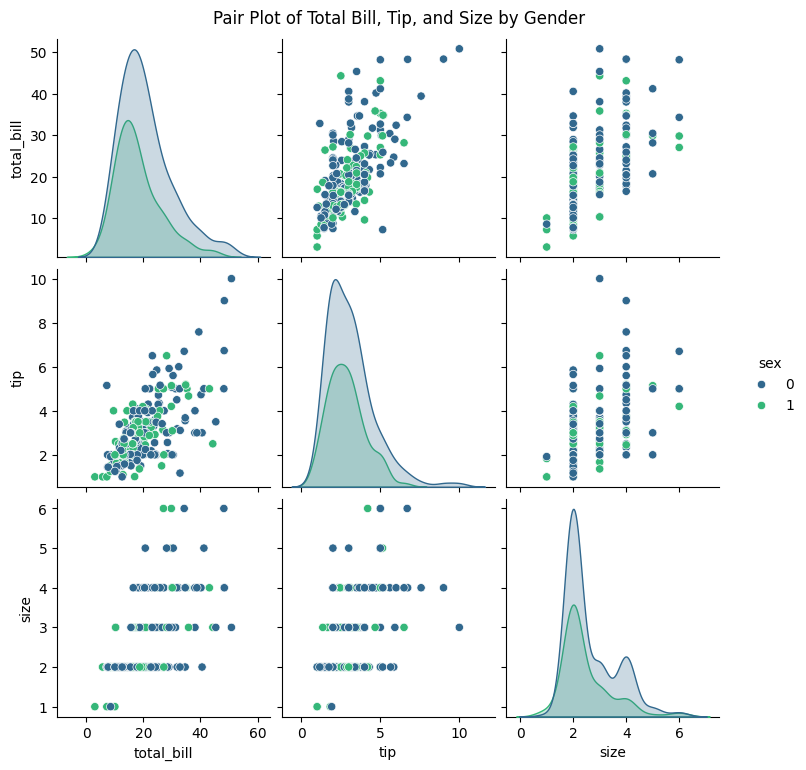

In [ ]:
sns.pairplot(df, vars=['total_bill', 'tip', 'size'], hue='sex', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Total Bill, Tip, and Size by Gender', y=1.02)
plt.show()

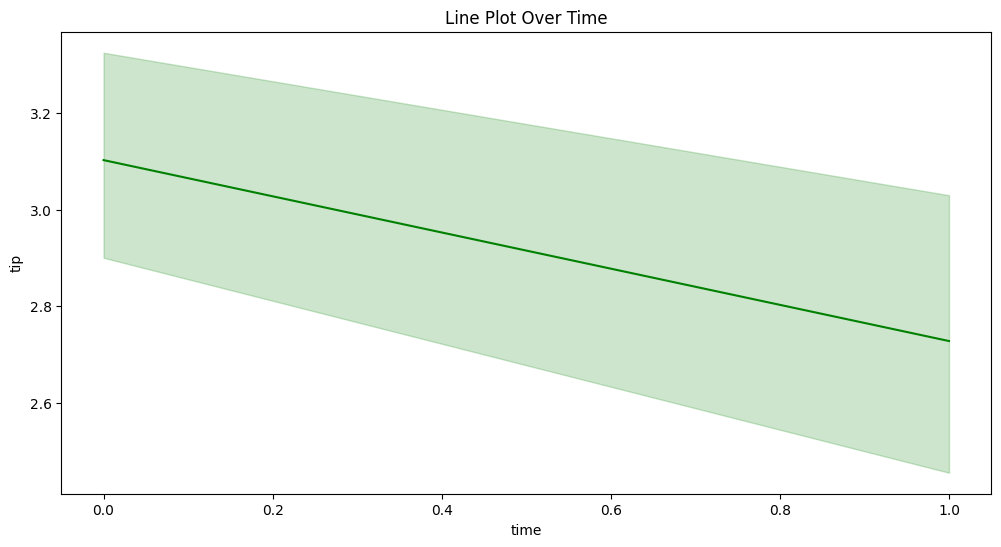

In [ ]:
if 'time' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='time', y='tip', color='g')  # Replace with actual time and target columns
    plt.title("Line Plot Over Time")
    plt.show()

<Axes: xlabel='size', ylabel='count'>

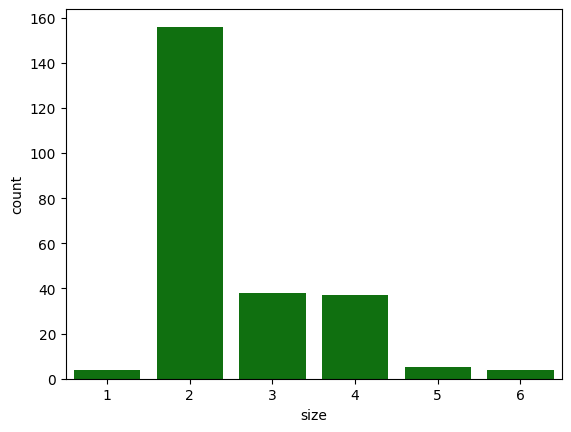

In [ ]:
sns.countplot(x='size',data=df, color='g')

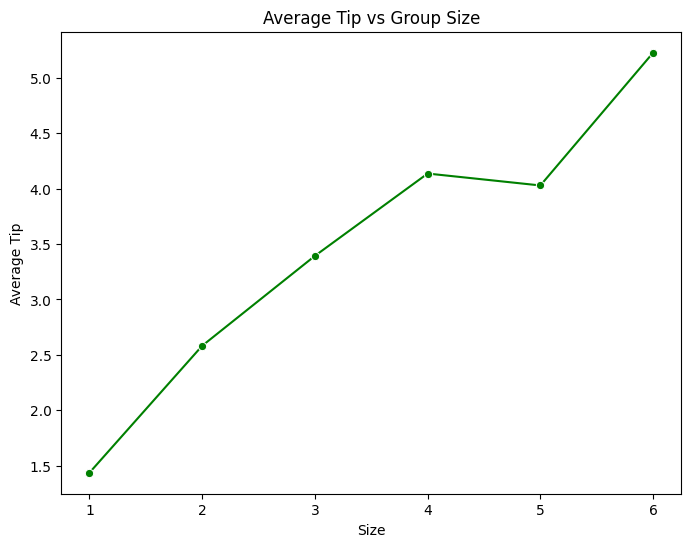

In [ ]:
avg_tip_per_size = df.groupby('size')['tip'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_tip_per_size, x='size', y='tip', marker='o', color='g')
plt.title('Average Tip vs Group Size')
plt.xlabel('Size')
plt.ylabel('Average Tip')
plt.show()

In [ ]:
# Separating target and features
features = df.drop(columns=['tip'])
target = df['tip']

# Identifying numerical and categorical features
num_features = features.select_dtypes(include=['float64', 'int64']).columns
cat_features = features.select_dtypes(include=['object']).columns

# Defining transformations for numerical and categorical data
num_scaler = StandardScaler()
cat_encoder = OneHotEncoder(handle_unknown='ignore')

# Preprocessor for combining transformations
data_processor = ColumnTransformer(
    transformers=[
        ('numeric', num_scaler, num_features),
        ('categorical', cat_encoder, cat_features)
    ]
)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Model': model, 'RMSE': rmse, 'R-squared': r2}
    print(f"{name} RMSE: {rmse:.4f}, R-squared: {r2:.4f}")

Linear Regression RMSE: 0.8387, R-squared: 0.4373
Ridge Regression RMSE: 0.8373, R-squared: 0.4391
Lasso Regression RMSE: 0.7527, R-squared: 0.5467
Support Vector Machine RMSE: 0.7290, R-squared: 0.5749
K-Nearest Neighbors RMSE: 0.9223, R-squared: 0.3195
Decision Tree RMSE: 1.2267, R-squared: -0.2038
Random Forest RMSE: 0.9745, R-squared: 0.2402


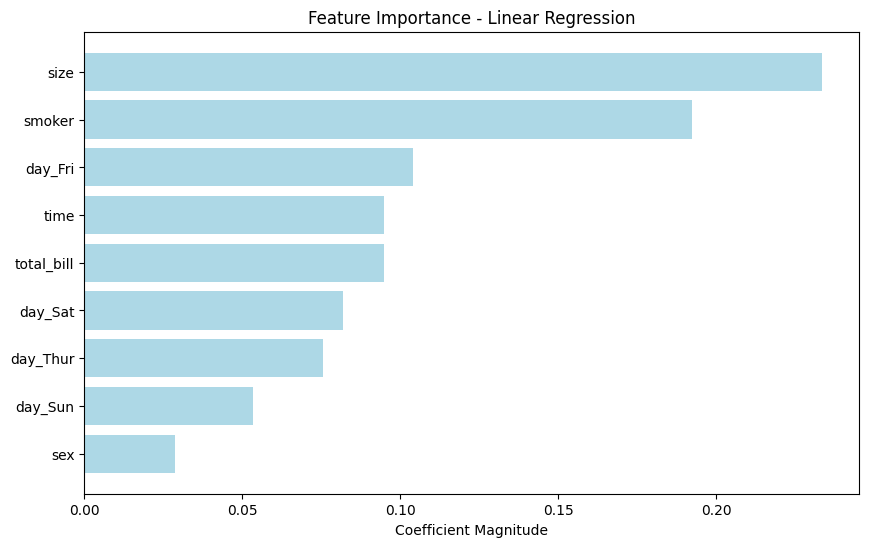

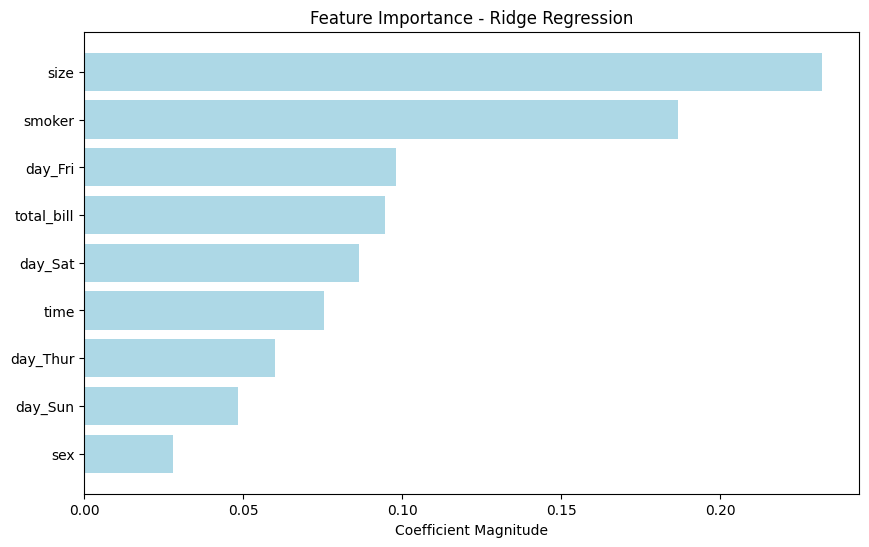

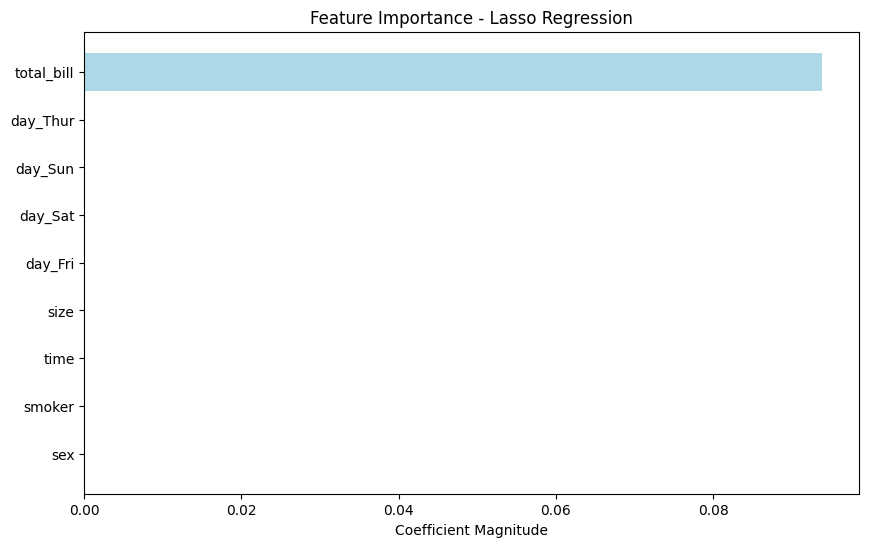

Feature importance not supported for model: Support Vector Machine.
Feature importance not supported for model: K-Nearest Neighbors.


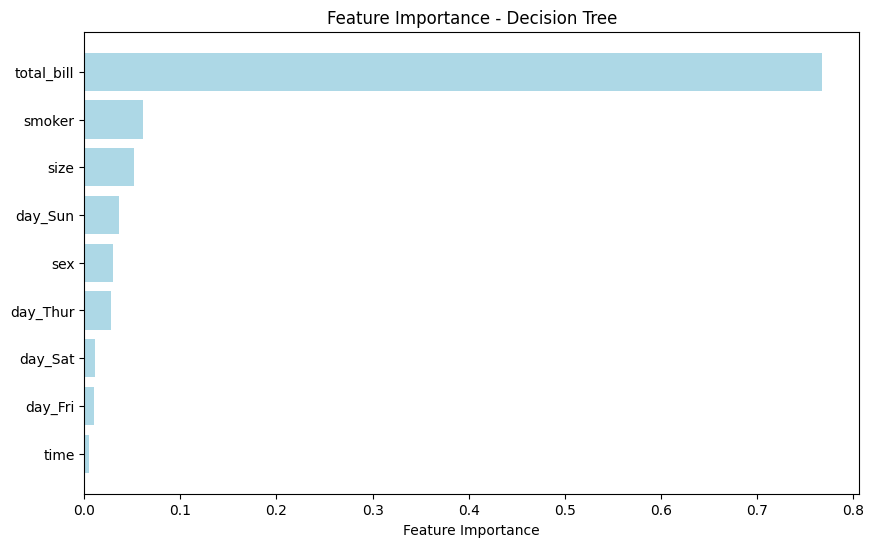

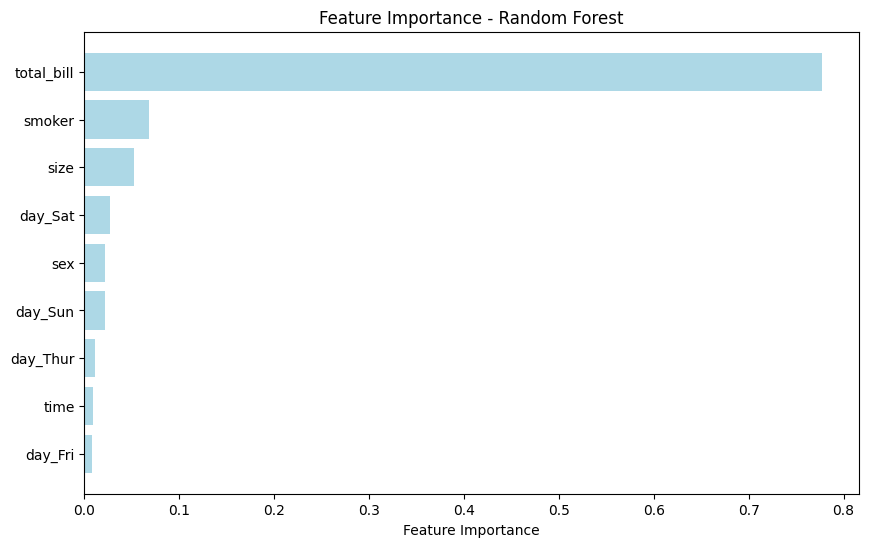

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models that support feature importance or coefficients
tree_based_models = ['Decision Tree', 'Random Forest']
linear_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

# Function to visualize feature importance
def plot_feature_importance(model, model_name, feature_names):
    if model_name in tree_based_models:
        importance_values = model.feature_importances_
    elif model_name in linear_models:
        importance_values = np.abs(model.coef_)
    else:
        print(f"{model_name} does not provide feature importance data.")
        return

    # Sort feature importance in descending order
    indices_sorted = np.argsort(importance_values)[::-1]
    sorted_features = [feature_names[i] for i in indices_sorted]
    sorted_importance_values = importance_values[indices_sorted]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importance_values, color='lightblue')
    plt.xlabel("Feature Importance" if model_name in tree_based_models else "Coefficient Magnitude")
    plt.title(f"Feature Importance - {model_name}")
    plt.gca().invert_yaxis()
    plt.show()

# Assuming feature names are available from the training data
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i+1}" for i in range(X_train.shape[1])]

# Plot feature importance for applicable models
for name, model in models.items():
    if hasattr(model, "feature_importances_") or hasattr(model, "coef_"):
        plot_feature_importance(model, name, feature_names)
    else:
        print(f"Feature importance not supported for model: {name}.")


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    #calculating metrics
    metrics = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
        "Train R^2": r2_score(y_train, y_pred_train),
        "Test R^2": r2_score(y_test, y_pred_test)
    }
    return metrics


In [ ]:
# Linear Regression Pipeline
lin_reg_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                                   ('model', LinearRegression())])

# Training the model
lin_reg_pipeline.fit(X_train, y_train)

# Evaluating the model performance
lin_reg_pipeline.fit(X_train, y_train)
lin_reg_metrics = evaluate_model(lin_reg_pipeline, X_train, X_test, y_train, y_test)

# Printing the metrics
print("Linear Regression Performance Metrics:", lin_reg_metrics)


Linear Regression Performance Metrics: {'Train MAE': 0.7644374167664689, 'Test MAE': 0.6703055381919141, 'Train MSE': 1.1054400388003873, 'Test MSE': 0.6947971285424552, 'Train R^2': 0.4559058975417888, 'Test R^2': 0.44414955497174413}


In [ ]:
# Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                                 ('model', Ridge(alpha=1.0))])

ridge_pipeline.fit(X_train, y_train)
ridge_metrics = evaluate_model(ridge_pipeline, X_train, X_test, y_train, y_test)
print("Ridge Regression Metrics:", ridge_metrics)

# Lasso Regression
lasso_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                                 ('model', Lasso(alpha=0.1))])

lasso_pipeline.fit(X_train, y_train)
lasso_metrics = evaluate_model(lasso_pipeline, X_train, X_test, y_train, y_test)
print("Lasso Regression Metrics:", lasso_metrics)

Ridge Regression Metrics: {'Train MAE': 0.7644704797659275, 'Test MAE': 0.669962500758094, 'Train MSE': 1.1054626590926349, 'Test MSE': 0.6937935810284823, 'Train R^2': 0.45589476390524974, 'Test R^2': 0.4449524113874277}
Lasso Regression Metrics: {'Train MAE': 0.7777388572470516, 'Test MAE': 0.6548092997732231, 'Train MSE': 1.1268744657359606, 'Test MSE': 0.612209255772415, 'Train R^2': 0.4453559401710817, 'Test R^2': 0.5102213678035941}


In [ ]:
# Support Vector Regression (SVR)
svr_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                               ('model', SVR(kernel='rbf', C=1.0))])

svr_pipeline.fit(X_train, y_train)
svr_metrics = evaluate_model(svr_pipeline, X_train, X_test, y_train, y_test)
print("Support Vector Regression Metrics:", svr_metrics)

Support Vector Regression Metrics: {'Train MAE': 0.6142827920037286, 'Test MAE': 0.6620743250101594, 'Train MSE': 0.9464018695377069, 'Test MSE': 0.7274680559325606, 'Train R^2': 0.5341839831225125, 'Test R^2': 0.4180122138929573}


In [ ]:
# Decision Tree Regression
tree_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                                ('model', DecisionTreeRegressor(max_depth=5))])

tree_pipeline.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_pipeline, X_train, X_test, y_train, y_test)
print("Decision Tree Regression Metrics:", tree_metrics)

Decision Tree Regression Metrics: {'Train MAE': 0.5532443797418156, 'Test MAE': 0.7016671899529043, 'Train MSE': 0.5970580751802802, 'Test MSE': 0.8463571936474642, 'Train R^2': 0.7061298974812129, 'Test R^2': 0.32289872336013514}


In [ ]:
# Random Forest Regression
rf_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)
print("Random Forest Regression Metrics:", rf_metrics)

Random Forest Regression Metrics: {'Train MAE': 0.31316461538461543, 'Test MAE': 0.7985326530612247, 'Train MSE': 0.18521003748717954, 'Test MSE': 1.0115186944897971, 'Train R^2': 0.9088402033798277, 'Test R^2': 0.1907664937158733}


In [ ]:
# K-Nearest Neighbors Regression
knn_pipeline = Pipeline(steps=[('preprocessor', data_processor),
                               ('model', KNeighborsRegressor(n_neighbors=5))])

knn_pipeline.fit(X_train, y_train)
knn_metrics = evaluate_model(knn_pipeline, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Regression Metrics:", knn_metrics)

K-Nearest Neighbors Regression Metrics: {'Train MAE': 0.6677128205128205, 'Test MAE': 0.7392244897959184, 'Train MSE': 0.8916067692307693, 'Test MSE': 0.8372368163265307, 'Train R^2': 0.5611539587649402, 'Test R^2': 0.33019519247954765}


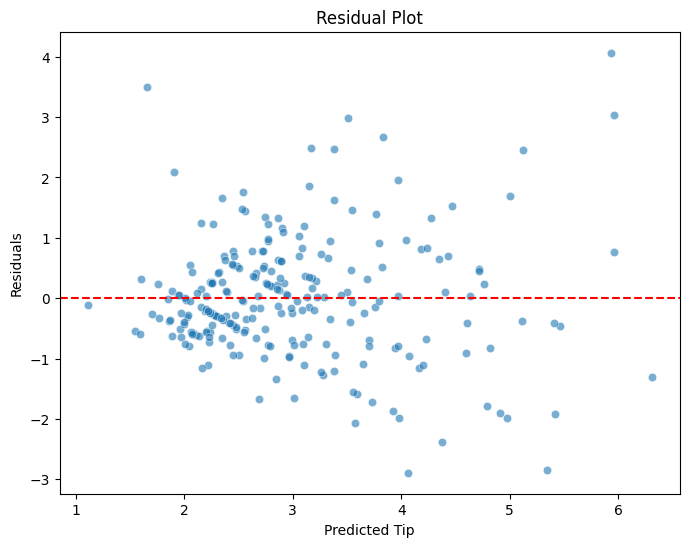

In [ ]:
from sklearn.impute import SimpleImputer
# Define X (predictors) and y (target)
X = df.drop('tip', axis=1)  # Replace 'tip' with the actual target column name
y = df['tip']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

lin_reg_pipeline.fit(X, y)

y_pred = lin_reg_pipeline.predict(X)

residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title("Residual Plot")
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = df.drop('tip', axis=1)
y = df['tip']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

X_processed_with_const = sm.add_constant(X_processed)

linear_model = sm.OLS(y, X_processed_with_const).fit()

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)

print(f'Rainbow test statistic: {rainbow_statistic}')
print(f'Rainbow test p-value: {rainbow_p_value}')

if rainbow_p_value < 0.05:
    print("The relationship is likely non-linear (reject linearity).")
else:
    print("The relationship is likely linear (fail to reject linearity).")

Rainbow test statistic: 1.2140951832493776
Rainbow test p-value: 0.14631718069156094
The relationship is likely linear (fail to reject linearity).


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = df.drop('tip', axis=1)
y = df['tip']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

X_processed_with_const = sm.add_constant(X_processed)

linear_model = sm.OLS(y, X_processed_with_const).fit()

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)

print(f'Rainbow test statistic: {rainbow_statistic}')
print(f'Rainbow test p-value: {rainbow_p_value}')

if rainbow_p_value < 0.05:
    print("The relationship is likely non-linear (reject linearity).")
else:
    print("The relationship is likely linear (fail to reject linearity).")

Rainbow test statistic: 1.2140951832493776
Rainbow test p-value: 0.14631718069156094
The relationship is likely linear (fail to reject linearity).


                   Train MAE  Test MAE  Train MSE  Test MSE  Train R^2  \
Linear Regression   0.764437  0.670306   1.105440  0.694797   0.455906   
Ridge Regression    0.764470  0.669963   1.105463  0.693794   0.455895   
Lasso Regression    0.777739  0.654809   1.126874  0.612209   0.445356   
Decision Tree       0.553244  0.701667   0.597058  0.846357   0.706130   
Random Forest       0.313165  0.798533   0.185210  1.011519   0.908840   
SVR                 0.614283  0.662074   0.946402  0.727468   0.534184   
KNN                 0.667713  0.739224   0.891607  0.837237   0.561154   

                   Test R^2  
Linear Regression  0.444150  
Ridge Regression   0.444952  
Lasso Regression   0.510221  
Decision Tree      0.322899  
Random Forest      0.190766  
SVR                0.418012  
KNN                0.330195  


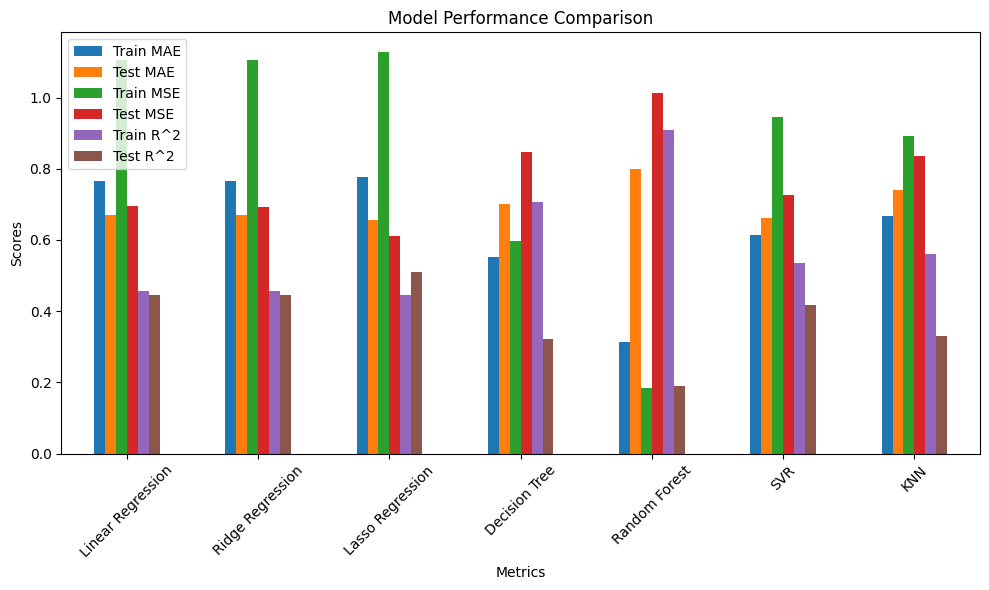

In [ ]:
import matplotlib.pyplot as plt

# Compile performance metrics for all models into a DataFrame for comparison
metrics_comparison_df = pd.DataFrame({
    "Linear Regression": lin_reg_metrics,
    "Ridge Regression": ridge_metrics,
    "Lasso Regression": lasso_metrics,
    "Decision Tree": tree_metrics,
    "Random Forest": rf_metrics,
    "SVR": svr_metrics,
    "KNN": knn_metrics
})

# Transpose the DataFrame for better readability (models as rows)
metrics_comparison_df = metrics_comparison_df.T

# Displaying the comparison of metrics
print(metrics_comparison_df)

# Plotting the results for comparison
metrics_comparison_df.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()